LogyCo

In [1]:
import random

def find_hamiltonian_cycle(distance, visit_city, curr_pos, cities, count, cost, hamiltonian_cycle, path, final_path):
    # Base case: if all cities have been visited
    if count == cities:
        if cost < hamiltonian_cycle:
            hamiltonian_cycle = cost
            final_path.clear()
            final_path.extend(path)
        return hamiltonian_cycle

    # Backtracking
    for i in range(cities):
        if not visit_city[i] and distance[curr_pos][i] > 0:
            visit_city[i] = True
            path.append(i+1)
            hamiltonian_cycle = find_hamiltonian_cycle(distance, visit_city, i, cities, count + 1, cost + distance[curr_pos][i], hamiltonian_cycle, path, final_path)
            visit_city[i] = False
            path.pop()
    
    return hamiltonian_cycle


# Ingreso de la Matriz de Adyacencia
cities = 0
with open('distance_matrix.txt', 'r') as file:
    cities = int(file.readline().strip())

# 10% Aproximado de probabilidad de que haya una ciudad con derrumbe.
cont_derr = 0
derrumbe = 10  # 10% probabilidad derrumbe
noderrumbe = 90  # 90% probabilidad no derrumbe
total = derrumbe + noderrumbe
# Se encuentra una cantidad contDerr de derrumbes.
for _ in range(cities):
    calculo = random.randint(1, total)
    if calculo > noderrumbe:
        cont_derr += 1
print("Cantidad de derrumbes:", cont_derr)

# Ingreso de la matriz de adyacencia original y sin modificaciones
distance = []
with open('distance_matrix.txt', 'r') as file:
    file.readline()  # Saltar la primera línea
    for _ in range(cities):
        row = list(map(int, file.readline().strip().split()))
        distance.append(row)

# IMPRESIÓN DE LA MATRIZ DE ADYACENCIA ORIGINAL (P R U E B A)
for row in distance:
    print(" ".join(map(str, row)))

# Decisión de columnas y filas a eliminar de forma aleatoria
# partiendo de la cantidad de derrumbes generada previamente
print("Ciudades removidas:")
new_cities = cities
temp1 = distance  # en esta matriz se guardará la nueva matriz
for _ in range(cont_derr):  # se repetirá el proceso de eliminación de ciudad un total de contDerr veces.
    row_col_to_remove = random.randint(1, new_cities)
    temp = [[0] * (new_cities - 1) for _ in range(new_cities - 1)]  # se crea una nueva temporal para que no cree interferencias con la matriz original.
    temp_row = 0
    for r in range(new_cities):
        if r == row_col_to_remove - 1:
            continue
        temp_col = 0
        for c in range(new_cities):
            if c == row_col_to_remove - 1:
                continue
            temp[temp_row][temp_col] = temp1[r][c]
            temp_col += 1
        temp_row += 1

    new_cities -= 1
    temp1 = temp
    print(row_col_to_remove)

print("Resultante de eliminar ciudades inaccesibles:")
# IMPRESIÓN MATRIZ MODIFICADA
for row in temp1:
    print(" ".join(map(str, row)))

# Implementación ciudades con llovizna
# Cálculo (CANTIDAD) basándose en posibilidad de lluvia en ciudades (20%)
cont_lluvia = 0
nolluvia = 80  # Posibilidad de que no llueva = 80%
for _ in range(new_cities):
    calculo = random.randint(1, total)
    if calculo > nolluvia:
        cont_lluvia += 1

if cont_lluvia > 1:
    print("Va a llover en", cont_lluvia, "ciudades.")
elif cont_lluvia == 0:
    print("No se presentaron lluvias.")
elif cont_lluvia == 1:
    print("Va a llover en una ciudad.")

# Cambio de pesos
for _ in range(cont_lluvia):
    rand_col = random.randint(0, new_cities - 1)  # Generación de random entre 0 y la cantidad de ciudades
    rand_row = random.randint(0, new_cities - 1)  # Generación de random entre 0 y la cantidad de ciudades
    cambio = temp1[rand_row][rand_col]  # Se guarda el contenido de la matriz en las posiciones generadas
    doble = cambio * 2
    random_val = random.randint(cambio, doble)  # Generación de un random entre el valor y su doble
    temp1[rand_row][rand_col] = random_val  # Se cambia la variable por el random previamente generado
    cor_row = rand_row + 1  # Por facilidad a la hora de leer el nodo eliminado se le suma un 1 a una variable temporal
    cor_col = rand_col + 1
    print("El camino", cor_row, ",", cor_col, "tendrá un cambio a:")
    print(temp1[rand_row][rand_col])

print()
print("Resultante de modificar ciudades con lluvia.")
for row in temp1:
    print(" ".join(map(str, row)))

visit_city = [False] * cities
visit_city[0] = True
hamiltonian_cycle = float('inf')
path = [1]
final_path = []
hamiltonian_cycle = find_hamiltonian_cycle(temp1, visit_city, 0, new_cities, 1, 0, hamiltonian_cycle, path, final_path)
print()
print("Tiempo en minutos:", hamiltonian_cycle)
print("Camino Óptimo:", final_path)
dias = (hamiltonian_cycle // 60 // 8) + 1
print("Días gastados:", dias)

Cantidad de derrumbes: 2
0 360 620 780 364 782 989 255 679 857
345 0 345 568 1005 235 345 1000000 1000 10
345 979 0 345 3462 957 346 846 1367 129
886 371 998 0 1000000 849 264 547 457 999
1000000 346 50 351 0 968 978 989 929 857
385 925 858 253 878 246 936 979 236 767
346 968 683 346 234 1000000 825 965 468 126
2356 468 468 8348 295 238 969 284 858 365
878 949 235 768 978 235 927 948 948 939
457 349 268 2385 685 939 828 969 238 867
Ciudades removidas:
8
8
Resultante de eliminar ciudades inaccesibles:
0 360 620 780 364 782 989 857
345 0 345 568 1005 235 345 10
345 979 0 345 3462 957 346 129
886 371 998 0 1000000 849 264 999
1000000 346 50 351 0 968 978 857
385 925 858 253 878 246 936 767
346 968 683 346 234 1000000 825 126
457 349 268 2385 685 939 828 867
Va a llover en una ciudad.
El camino 6 , 6 tendrá un cambio a:
378

Resultante de modificar ciudades con lluvia.
0 360 620 780 364 782 989 857
345 0 345 568 1005 235 345 10
345 979 0 345 3462 957 346 129
886 371 998 0 1000000 849 264 9

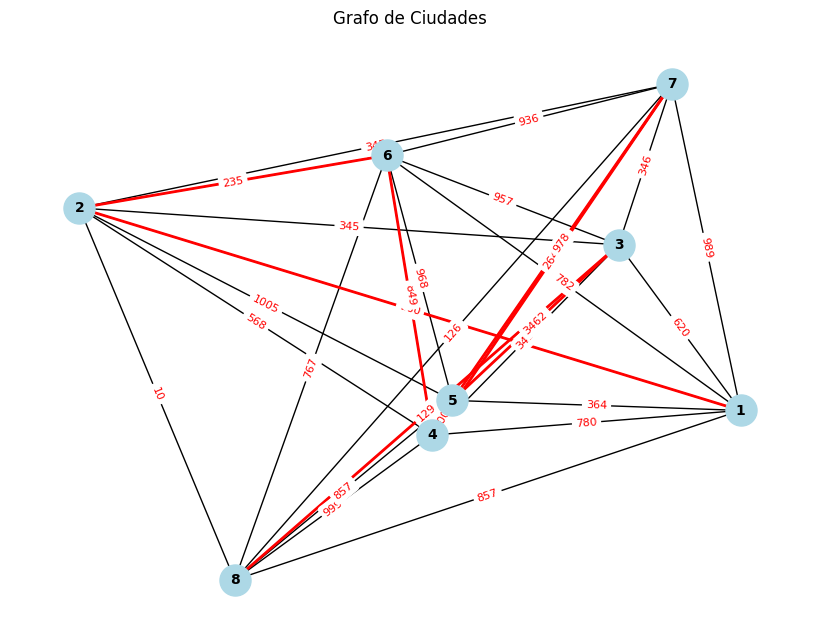

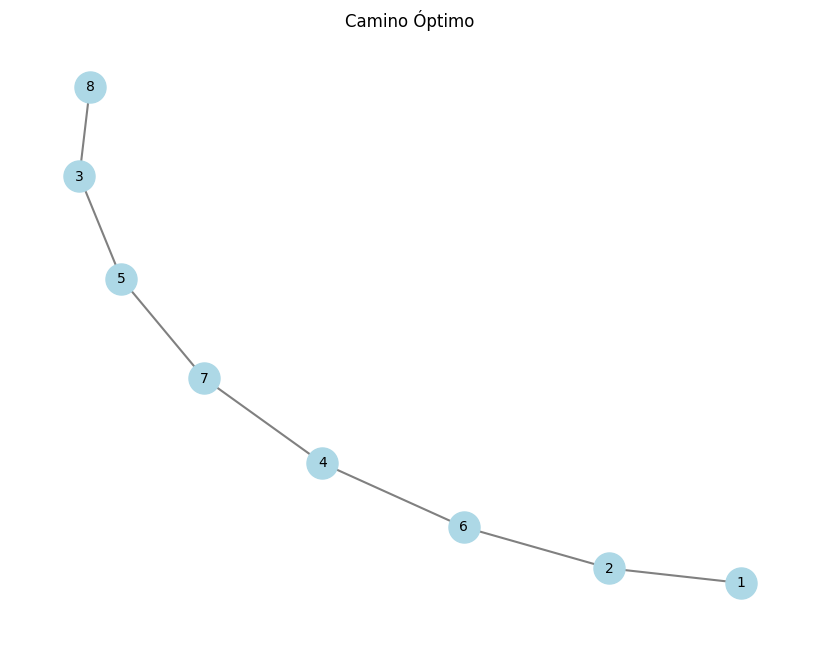

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

def print_graph(distance_matrix,path):
    """Esta función imprime el grafo de la ruta

    :param distance_matrix: _description_
    :type distance_matrix: _type_
    """
    G = nx.Graph()

    # Agregar nodos al grafo
    cities = len(distance_matrix)
    G.add_nodes_from(range(1, cities + 1))

    # Agregar aristas al grafo
    for i in range(cities):
        for j in range(i + 1, cities):
            weight = distance_matrix[i][j]
            if weight > 0:
                G.add_edge(i + 1, j + 1, weight=weight)

    # Obtener posición de los nodos para visualización
    pos = nx.spring_layout(G)

    # Obtener los pesos de las aristas
    edge_labels = nx.get_edge_attributes(G, 'weight')

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold')
    
    # # Calcular posiciones de las etiquetas debajo de los nodos
    # node_labels_pos = {node: (x, y - 5) for node, (x, y) in pos.items()}

    # Dibujar las aristas del camino resaltadas
    path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.0)
    # # Dibujar las etiquetas de los nodos
    # node_labels = {node: str(node) for node in G.nodes}
    # nx.draw_networkx_labels(G, node_labels_pos, labels=node_labels, font_size=20, font_color='black', verticalalignment='top')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')

    # Mostrar el grafo
    plt.title('Grafo de Ciudades')
    plt.axis('off')
    plt.show()
    
print_graph(temp1,final_path)##Se dibuja el grafo

def print_camino(way):
    G = nx.Graph()
    G.add_nodes_from(range(1, new_cities+1))

    # Agregar las aristas del camino óptimo
    for i in range(len(way)-1):
        city1 = final_path[i]
        city2 = final_path[i+1]
        G.add_edge(city1, city2)

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_color='black', width=1.5, edge_color='gray')
    plt.title('Camino Óptimo')
    plt.axis('off')
    plt.show()
print_camino(final_path)

def save_graph_as_image(distance_matrix, file_path):
    G = nx.Graph()

    # Agregar nodos al grafo
    cities = len(distance_matrix)
    G.add_nodes_from(range(1, cities + 1))

    # Agregar aristas al grafo
    for i in range(cities):
        for j in range(i + 1, cities):
            weight = distance_matrix[i][j]
            if weight > 0:
                G.add_edge(i + 1, j + 1, weight=weight)

    # Obtener posición de los nodos para visualización
    pos = nx.spring_layout(G)

    # Obtener los pesos de las aristas
    edge_labels = nx.get_edge_attributes(G, 'weight')

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')

    # Guardar el grafo como imagen
    plt.title('Grafo de Ciudades')
    plt.axis('off')
    plt.savefig(file_path, format='png', dpi=300)
    plt.close()

# Utilizar la matriz de distancia modificada y guardar el grafo como imagen
save_graph_as_image(temp1, 'grafo_ciudades.png')

*GUI*

In [3]:
##Version 2
import tkinter as tk
from PIL import ImageTk, Image

class GraphImageGUI:
    def __init__(self, image_path, logo_path):
        self.root = tk.Tk()
        self.root.title("Grafo de Ciudades")

        # Crear un widget de lienzo (Canvas) para mostrar la imagen y las etiquetas
        self.canvas = tk.Canvas(self.root, width=800, height=500)
        self.canvas.pack()

        # Cargar la imagen del grafo y redimensionarla
        graph_image = Image.open(image_path)
        resized_image = graph_image.resize((800, 500))  # Ajustar el tamaño según sea necesario

        # Convertir la imagen redimensionada a formato compatible con Tkinter
        self.graph_image = ImageTk.PhotoImage(resized_image)

        # Mostrar la imagen en el lienzo (Canvas)
        self.canvas.create_image(0, 15, anchor=tk.NW, image=self.graph_image)

        # Cargar la imagen del logotipo
        logo_image = Image.open(logo_path)
        logo_image = logo_image.resize((100, 100))  # Ajustar el tamaño según sea necesario
        self.logo_image = ImageTk.PhotoImage(logo_image)
               
        #Funcionalidades
        boton = tk.Button(self.root, text="Obtener el camino óptimo para la ruta", command=self.boton_action())
        boton.pack()
        
        # Mostrar el logotipo en el lienzo (Canvas)
        self.canvas.create_image(10, 10, anchor=tk.NW, image=self.logo_image)

        # Agregar una etiqueta sobre la imagen
        self.canvas.create_text(395,20, text="Rutas de distribución y logística - LogiCo ", font=("Comic Sans MS", 16), fill="red")
    
    def boton_action(self):
        """Muestra el camino optimo
        """
        print('hello world')
        
    def run(self):
        """This function run the GUI
        """
        self.root.mainloop()

# Ruta de la imagen del grafo
image_path = "grafo_ciudades.png"

# Ruta de la imagen del logotipo
logo_path = "image\\README\\Logo.png"  # Reemplazar con la ruta completa al logotipo

# Crear la GUI y ejecutarla
graph_gui = GraphImageGUI(image_path, logo_path)
graph_gui.run()

hello world
